# Explatory Data Analysis of Celeb-DF dataset




In [4]:
#Mount google drive
from google.colab import drive
drive.mount('/content/drive')

import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## 1. EDA of hand-crafted data
In this section hand-crafted data is explored and visualized to have an idea how the data is shaped.

## Inspect and Visualize hand-crafted features

Each video processed with Openface has a csv file with their corresponding features. The first 5 columns are deleted since they are not informative. Each video has multiple frames, depending on how long the video is. In the preprocessing functions below, the hand-crafted features are processed into a vector of the first x frames, containing the 709 hand-crafted features.


The movementens of facial musclees can be encoded using facial action units (AU) (Ekman and Wallace, 1976 (see paper 'protecting world leaders source 10)). The OpenFace2.0 toolkit extracts the occurence and intensity of 17 action units in a video. 

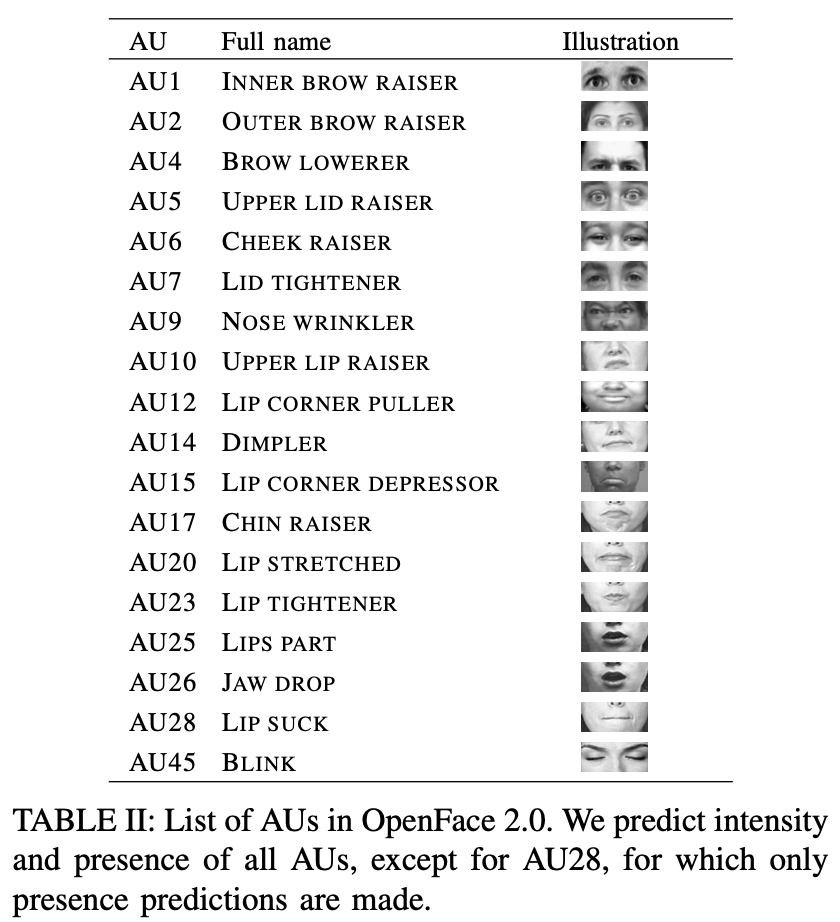

Our model incorporate all 17 AU and these AU are augmented with the following features:
1. Head rotation

In [5]:
df = pd.read_csv('/content/drive/My Drive/Thesis Deepfakes 2021/data_sampled/real_hand/id2_0000.csv')
df

,frame,face_id,timestamp,confidence,success,gaze_0_x,gaze_0_y,gaze_0_z,gaze_1_x,gaze_1_y,gaze_1_z,gaze_angle_x,gaze_angle_y,eye_lmk_x_0,eye_lmk_x_1,eye_lmk_x_2,eye_lmk_x_3,eye_lmk_x_4,eye_lmk_x_5,eye_lmk_x_6,eye_lmk_x_7,eye_lmk_x_8,eye_lmk_x_9,eye_lmk_x_10,eye_lmk_x_11,eye_lmk_x_12,eye_lmk_x_13,eye_lmk_x_14,eye_lmk_x_15,eye_lmk_x_16,eye_lmk_x_17,eye_lmk_x_18,eye_lmk_x_19,eye_lmk_x_20,eye_lmk_x_21,eye_lmk_x_22,eye_lmk_x_23,eye_lmk_x_24,eye_lmk_x_25,eye_lmk_x_26,...,p_29,p_30,p_31,p_32,p_33,AU01_r,AU02_r,AU04_r,AU05_r,AU06_r,AU07_r,AU09_r,AU10_r,AU12_r,AU14_r,AU15_r,AU17_r,AU20_r,AU23_r,AU25_r,AU26_r,AU45_r,AU01_c,AU02_c,AU04_c,AU05_c,AU06_c,AU07_c,AU09_c,AU10_c,AU12_c,AU14_c,AU15_c,AU17_c,AU20_c,AU23_c,AU25_c,AU26_c,AU28_c,AU45_c
0,1,0,0.000,0.98,1,0.067607,0.246884,-0.966684,0.001882,0.233208,-0.972425,0.036,0.243,259.6,261.0,265.4,270.2,272.6,271.6,266.8,262.0,254.8,257.6,261.6,266.7,271.9,276.0,279.0,276.1,271.7,266.7,262.1,257.9,264.5,266.5,268.4,269.0,268.0,265.9,264.1,...,0.081,0.185,-0.088,0.034,0.149,0.0,0.0,0.0,0.0,0.45,0.61,0.26,0.84,0.06,0.00,0.0,2.27,0.12,1.10,0.00,0.42,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0.033,0.98,1,0.060461,0.278495,-0.958533,0.011661,0.269350,-0.962972,0.038,0.278,259.6,260.8,265.1,269.8,272.2,271.3,266.7,262.0,254.6,257.6,261.8,266.9,271.8,275.5,278.0,275.5,271.7,267.1,262.4,258.0,264.2,266.2,268.0,268.5,267.5,265.5,263.7,...,0.208,0.097,-0.142,0.062,0.202,0.0,0.0,0.0,0.0,0.48,0.60,0.09,0.92,0.03,0.00,0.0,2.09,0.21,1.16,0.05,0.45,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0
2,3,0,0.067,0.98,1,0.053184,0.277567,-0.959233,0.003650,0.267872,-0.963448,0.030,0.276,259.4,260.7,265.0,269.7,272.1,271.2,266.6,261.8,254.6,257.5,261.7,266.8,271.8,275.6,278.4,275.7,271.6,266.9,262.2,258.0,264.2,266.1,267.9,268.5,267.5,265.5,263.7,...,0.177,0.131,-0.154,0.049,0.213,0.0,0.0,0.0,0.0,0.48,0.59,0.00,0.90,0.01,0.00,0.0,1.89,0.22,1.12,0.05,0.73,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,1.0
3,4,0,0.100,0.98,1,0.069347,0.256656,-0.964012,-0.005829,0.251622,-0.967808,0.033,0.257,259.4,260.7,265.0,269.8,272.2,271.3,266.6,261.9,254.4,257.3,261.5,266.6,271.6,275.4,278.0,275.5,271.5,266.8,262.2,257.8,264.1,266.2,268.0,268.6,267.5,265.5,263.6,...,0.079,0.336,-0.183,0.003,0.186,0.0,0.0,0.0,0.0,0.42,0.61,0.04,0.81,0.00,0.00,0.0,1.93,0.31,0.95,0.02,0.83,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,5,0,0.133,0.98,1,0.087020,0.223989,-0.970699,0.002719,0.245277,-0.969449,0.046,0.237,259.0,260.2,264.5,269.5,272.1,271.3,266.6,261.6,253.3,256.5,260.8,266.1,271.2,275.2,278.0,275.5,271.3,266.5,261.6,257.0,263.9,266.0,267.8,268.3,267.2,265.1,263.3,...,-0.090,0.371,-0.062,-0.036,0.191,0.0,0.0,0.0,0.0,0.34,0.62,0.06,0.71,0.00,0.00,0.0,1.94,0.26,0.91,0.00,0.80,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
440,441,0,14.667,0.98,1,0.180109,0.202709,-0.962533,0.124358,0.258085,-0.958085,0.157,0.235,283.9,284.7,289.0,294.2,297.3,296.8,292.2,287.0,277.0,280.2,284.8,290.4,295.7,299.7,302.5,300.4,296.4,291.6,286.4,281.4,288.9,291.1,292.9,293.2,292.0,289.8,288.0,...,-0.442,0.349,0.233,-0.145,0.028,0.0,0.0,0.0,0.0,0.19,0.00,0.00,0.20,0.00,0.78,0.0,0.62,0.00,0.13,0.00,0.26,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
441,442,0,14.700,0.98,1,0.187324,0.204802,-0.960711,0.126355,0.262870,-0.956522,0.162,0.239,284.0,284.8,289.1,294.3,297.3,296.9,292.2,287.1,277.1,280.2,284.8,290.4,295.7,299.7,302.5,300.4,296.4,291.5,286.4,281.4,289.0,291.2,292.9,293.3,292.0,289.8,288.1,...,-0.436,0.348,0.229,-0.146,0.020,0.0,0.0,0.0,0.0,0.24,0.0

In [3]:
for i, coln in enumerate(df):
  print(i, coln)

0 frame
1  face_id
2  timestamp
3  confidence
4  success
5  gaze_0_x
6  gaze_0_y
7  gaze_0_z
8  gaze_1_x
9  gaze_1_y
10  gaze_1_z
11  gaze_angle_x
12  gaze_angle_y
13  eye_lmk_x_0
14  eye_lmk_x_1
15  eye_lmk_x_2
16  eye_lmk_x_3
17  eye_lmk_x_4
18  eye_lmk_x_5
19  eye_lmk_x_6
20  eye_lmk_x_7
21  eye_lmk_x_8
22  eye_lmk_x_9
23  eye_lmk_x_10
24  eye_lmk_x_11
25  eye_lmk_x_12
26  eye_lmk_x_13
27  eye_lmk_x_14
28  eye_lmk_x_15
29  eye_lmk_x_16
30  eye_lmk_x_17
31  eye_lmk_x_18
32  eye_lmk_x_19
33  eye_lmk_x_20
34  eye_lmk_x_21
35  eye_lmk_x_22
36  eye_lmk_x_23
37  eye_lmk_x_24
38  eye_lmk_x_25
39  eye_lmk_x_26
40  eye_lmk_x_27
41  eye_lmk_x_28
42  eye_lmk_x_29
43  eye_lmk_x_30
44  eye_lmk_x_31
45  eye_lmk_x_32
46  eye_lmk_x_33
47  eye_lmk_x_34
48  eye_lmk_x_35
49  eye_lmk_x_36
50  eye_lmk_x_37
51  eye_lmk_x_38
52  eye_lmk_x_39
53  eye_lmk_x_40
54  eye_lmk_x_41
55  eye_lmk_x_42
56  eye_lmk_x_43
57  eye_lmk_x_44
58  eye_lmk_x_45
59  eye_lmk_x_46
60  eye_lmk_x_47
61  eye_lmk_x_48
62  eye_lmk_x

In [6]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445 entries, 0 to 444
Columns: 714 entries, frame to  AU45_c
dtypes: float64(711), int64(3)
memory usage: 2.4 MB


In [ ]:
feature_colnames = ['gaze_angle_x', 'gaze_angle_y', 'pose_Rx', 'pose_Ry', 'pose_Rz', 'AU01_r',
                  'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 
                  'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r', 
                  'mouth_openness', 'mouth_stretch'
                  ]
# Column indexes of hand-crafted features from openface (mouth openness and mouth stretch are added later)
feature_colindex = [11,12,296,297,298,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695]

In [7]:
df.shape
df.index
#print(df.columns)

new_data = df[[' AU01_r', ' AU02_r', ' AU04_r', ' AU05_r', ' AU06_r', ' AU07_r', ' AU09_r', ' AU10_r', ' AU12_r', 
      ' AU14_r', ' AU15_r', ' AU17_r', ' AU20_r', ' AU23_r', ' AU25_r', ' AU26_r', ' AU45_r']]

eye_gaze = df[[' gaze_angle_x', ' gaze_angle_y']]
head_poze = df[[' pose_Rx', ' pose_Ry', ' pose_Rz']]

n_max = np.array(new_data).max()
n_min = np.array(new_data).min()
nd = (new_data - n_min) / (n_max - n_min)


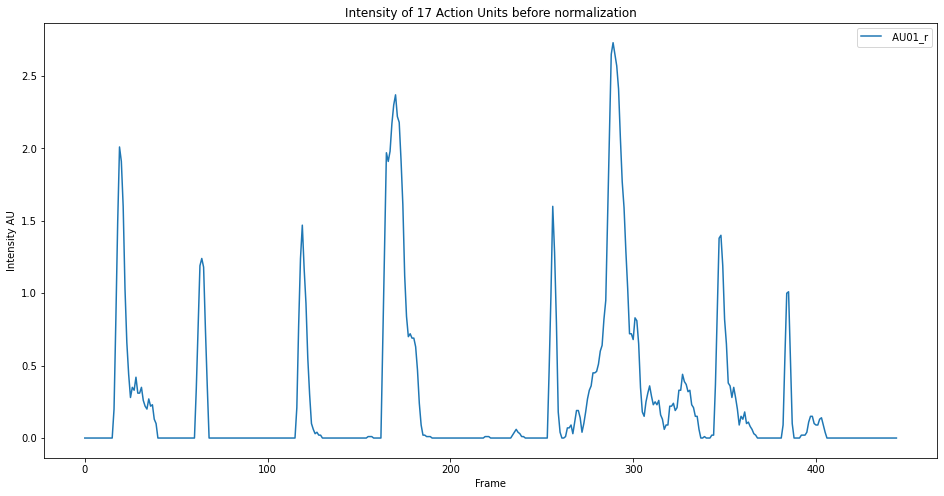

In [8]:
plt.figure(figsize=(16,8))
plt.title('Intensity of 17 Action Units before normalization')
plt.plot(new_data[' AU45_r'])
plt.ylabel('Intensity AU')
plt.xlabel('Frame')
plt.legend(new_data.columns)
plt.show()

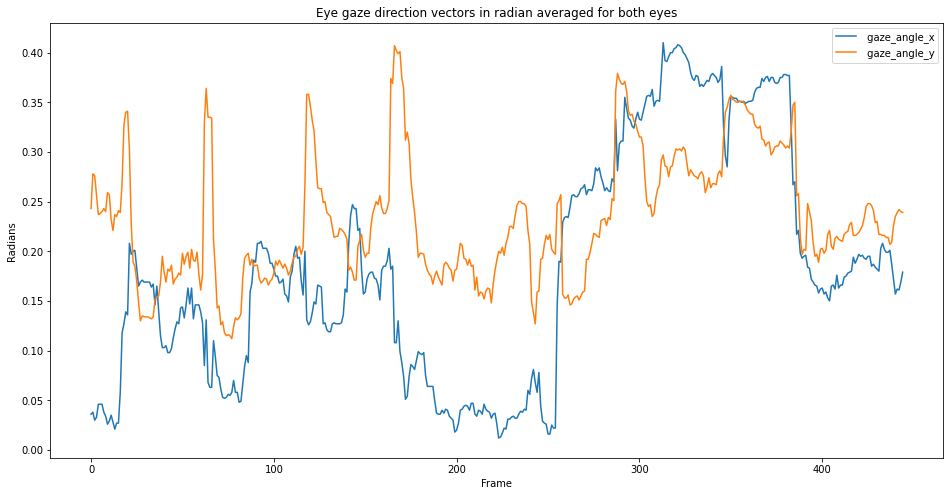

In [9]:
plt.figure(figsize=(16,8))
plt.title('Eye gaze direction vectors in radian averaged for both eyes')
plt.plot(eye_gaze)
plt.ylabel('Radians')
plt.xlabel('Frame')
plt.legend(eye_gaze.columns)
plt.show()

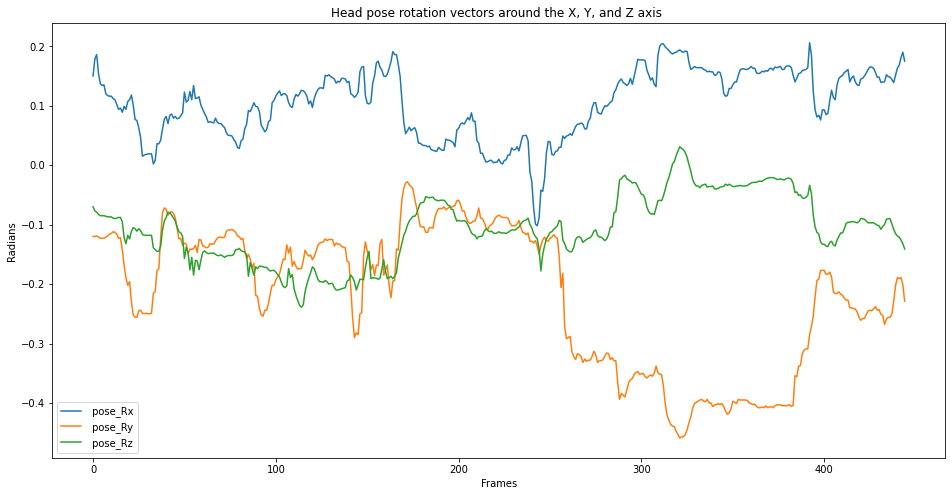

In [10]:
plt.figure(figsize=(16,8))
plt.title('Head pose rotation vectors around the X, Y, and Z axis ')
plt.plot(head_poze)
plt.ylabel('Radians')
plt.xlabel('Frames')
plt.legend(head_poze.columns)
plt.show()

## Compute additional hand-crafted features

In [18]:
# Visualize the mouth stretch vector
# Visualize the mouth stretch vecotor in amplitude, velocity and accelaration after normalization
data = np.array(df)
print(data.shape)

# For all frames, make a 3-dimensional array for each point
uppermouth = data[:, [486, 554, 622]]
lowermouth = data[:, [492, 560, 628]]
leftmouthcorner = data[:, [483, 551, 619]]
rightmouthcorner = data[:, [489, 557, 625]]
tip_nose = data[:, [465, 533, 601]]

def euclidean_distance(point1, point2):
  '''Function that computes the euclidean distance between two 3d points.'''
  return np.sqrt(np.sum((point1-point2)**2, axis=1))

# Calculate amplitude signals through euclidean distance
lipsuck = euclidean_distance(uppermouth, lowermouth)
mouthstretch = euclidean_distance(leftmouthcorner, rightmouthcorner)
nose_leftmouth = euclidean_distance(tip_nose, leftmouthcorner)
nose_rightmouth = euclidean_distance(tip_nose, rightmouthcorner)
nose_uppermouth = euclidean_distance(tip_nose, uppermouth)
nose_lowermouth = euclidean_distance(tip_nose, lowermouth)

# Calculate velocity signals by subtracting amplitude from its shifted version
mouthstretch_shifted = np.roll(mouthstretch, 1, axis=0)
#mouthstretch[:1] = 0
mouthstretch_velocity = mouthstretch_shifted - mouthstretch

mouthstretch_velocity_shifted = np.roll(mouthstretch_velocity, 1, axis=0)
#mouthstretch_velocity_shifted[:1] = 0
mouthstretch_acceleration = mouthstretch_velocity_shifted - mouthstretch_velocity

data_plot = np.array([mouthstretch, mouthstretch_velocity, mouthstretch_acceleration]).reshape(445, 3)
d_max = np.array(data_plot).max()
d_min = np.array(data_plot).min()
data_plot_normalized = (data_plot - d_min) / (d_max - d_min)
d = data_plot_normalized.reshape(len(data),3)

# For simplicity, the first frame is not set to zero in this example.

(445, 714)


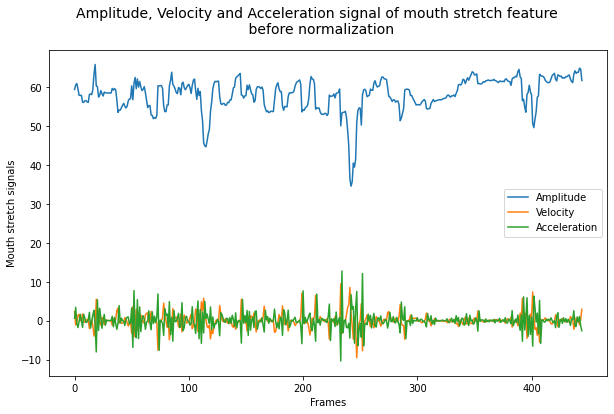

In [14]:
plt.figure(figsize=(10,6))
plt.suptitle('Amplitude, Velocity and Acceleration signal of mouth stretch feature \n before normalization', fontsize=14)
plt.plot(mouthstretch)
plt.plot(mouthstretch_velocity)
plt.plot(mouthstretch_acceleration)
plt.ylabel('Mouth stretch signals')
plt.xlabel('Frames')
plt.legend(['Amplitude', 'Velocity', 'Acceleration'])
plt.savefig('/content/drive/My Drive/Thesis Deepfakes 2021/plots/plot_mouthstretch.png')
plt.show()

(445, 3)
(10,)


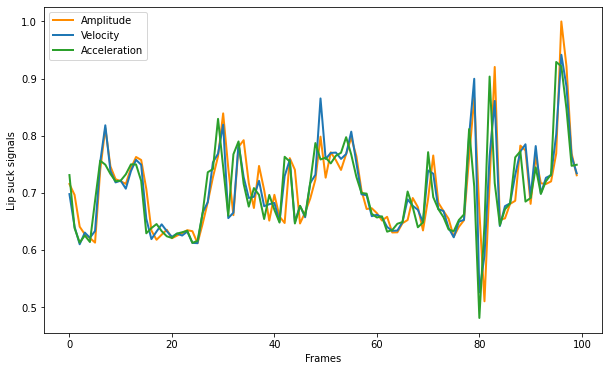

In [48]:
lipsuck_shifted = np.roll(lipsuck, 1, axis=0)
#lipsuck[:1] = 0
lipsuck_velocity = lipsuck_shifted - lipsuck
lipsuck_velocity_shifted = np.roll(lipsuck_velocity, 1, axis=0)
#lipsuck_velocity_shifted[:1] = 0
lipsuck_acceleration = lipsuck_velocity_shifted - lipsuck_velocity

data_plot = np.array([lipsuck, lipsuck_velocity, lipsuck_acceleration]).reshape(445, 3)
d_max = np.array(data_plot).max()
d_min = np.array(data_plot).min()
data_plot_normalized = (data_plot - d_min) / (d_max - d_min)
d = data_plot_normalized.reshape(len(data),3)
print(d.shape)
print(d[:,0][:10].shape)

plt.figure(figsize=(10,6))
#plt.suptitle('Amplitude, Velocity and Acceleration signal of mouth vertical feature \n after normalization', fontsize=14)
plt.plot(d[:,0][:100], linewidth=2, color='darkorange')
plt.plot(d[:,1][:100], linewidth=2, color='tab:blue')
plt.plot(d[:,2][:100], linewidth=2, color='tab:green')
plt.ylabel('Lip suck signals')
plt.xlabel('Frames')
plt.legend(['Amplitude', 'Velocity', 'Acceleration'])
plt.savefig('/content/drive/My Drive/Thesis Deepfakes 2021/plots/plot_lipsuck.png')
plt.show()

## Pre-process of Hand-Crafted Features

More info about the output file of OpenFace2.0, see: https://github.com/TadasBaltrusaitis/OpenFace/wiki/Output-Format

* Extract handcrafted features per every 5th, 10th and 30th frame!! Instead of using all frames, this speeds up computational time! See pseudocode below how to do this:

```
def organize_features(framestep=5, fake=0):
  videofiles = read_files() # define this functions seperately
  training_data = []

  for video in videofiles:
    for frame in range(start=0, end=len(video), stepsize=framestep)
      try:
        frame = features_for_frame()

        if framestep == 5:
          5_trainingdata.append(frame)

        if framestep == 10:
          10_trainingdata.append(frame)

        if framestep == 30:
          30_framestep.append(frame)

    except:
      continue
    
    return (training_data, label)
```

For the CNN architecture, I want to extract aligned face through OpenFace2.0 toolkit and use these faces as input to the CNN. This because research has shown that aligned faces are beneficial for facial recognition tasks. 


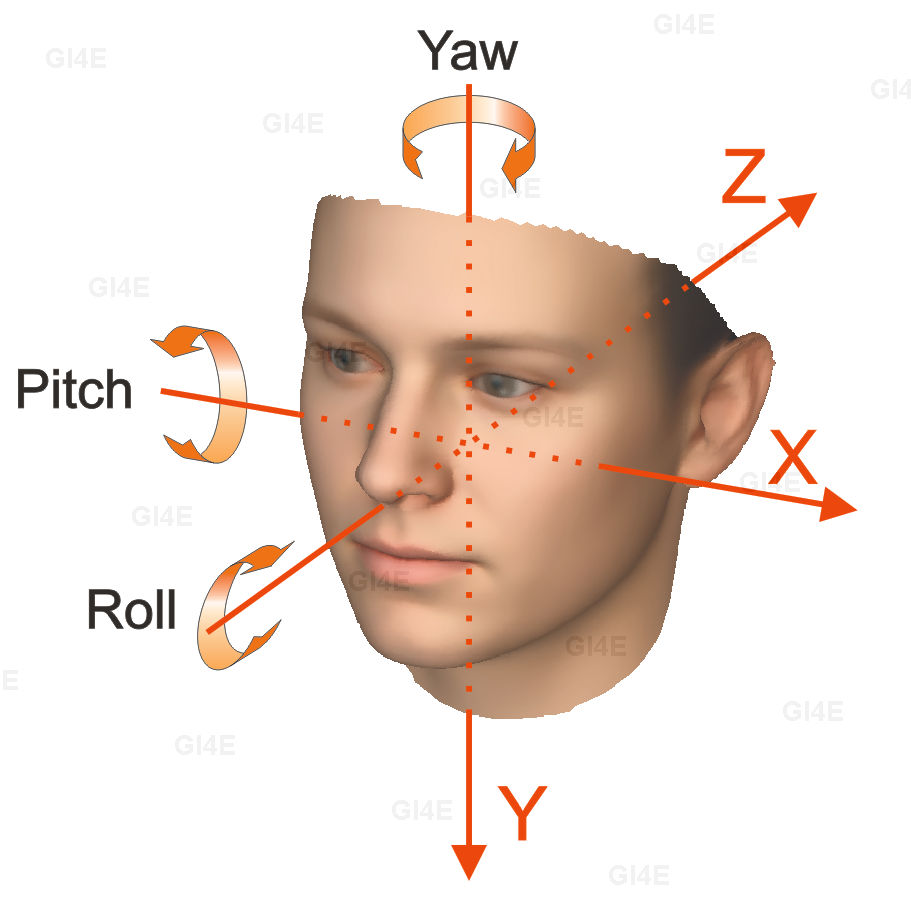

In [ ]:
import torch

feature_colnames = ['gaze_angle_x', 'gaze_angle_y', 'pose_Rx', 'pose_Ry', 'pose_Rz', 'AU01_r',
                  'AU02_r', 'AU04_r', 'AU05_r', 'AU06_r', 'AU07_r', 'AU09_r', 'AU10_r', 'AU12_r', 
                  'AU14_r', 'AU15_r', 'AU17_r', 'AU20_r', 'AU23_r', 'AU25_r', 'AU26_r', 'AU45_r', 
                  'mouth_openness', 'mouth_stretch'
                  ]
# Column indexes of hand-crafted features from openface (mouth openness and mouth stretch are added later)
feature_colindex = [11,12,296,297,298,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695]

def euclidean_distance(point1, point2):
  '''Function that computes the euclidean distance between two 3d points.'''
  return np.sqrt(np.sum((point1-point2)**2, axis=1))

def load_batch_handfeatures(x_batch_files, y_batch, n_frames):
  '''
  This function loads in all extracted csv files from OpenFace. 
    Input:
      x_batch_files: filenames of data batch to load in
      y_batch: labels corresponding to x_batch
      n_frames: number of frames per video 
  
    Return: 
      x_batch: numpy array containing all hand-crafted features with shape: (batchsize, features)
  '''
  # Create empty array to store values, shape is: (batchsize, n_frames(heigth), features(width))
  x_batch = np.zeros((len(x_batch_files), n_frames, 24), dtype=np.float32)

  # Loop over all filenames in x_batch_files
  print('[INFO] Looping over all files and loading real data...')
  for i, (filename, y) in enumerate(zip(x_batch_files, y_batch)):
    if y == 0:
      # Search for file in fake folder
      data = np.genfromtxt(filename, delimiter=',', skip_header=True)
      print('Loaded file in correctly, the shape of the file/ video is:', data.shape)
      
      # Calculate new features: mouth openness and eye openness of all frames
      uppermouth = data[:n_frames, [486, 554, 622]]
      lowermouth = data[:n_frames, [492, 560, 628]]
      leftmouthcorner = data[:n_frames, [483, 551, 619]]
      rightmouthcorner = data[:n_frames, [489, 557, 625]]

      mouthopenness = euclidean_distance(uppermouth, lowermouth)
      mouthstretch = euclidean_distance(leftmouthcorner, rightmouthcorner)

      # Only select partial number of frames
      data = data[:n_frames, feature_colindex]
      print('Data shape after deleting uninformative features', data.shape)

      # Add new features to the dataframe
      data = np.column_stack([data, mouthopenness, mouthstretch])
      print('Data shape after adding new features', data.shape)

      # Convert numpy to torch tensor and add into x_batch
      #data = torch.from_numpy(data)
      #print('torch shape', data.shape)
      x_batch[i] = data
      print('Shape of the batch data is: ', x_batch.shape)

    if y == 1: 
      # Search for file in real folder
      data = np.genfromtxt(filename, delimiter=',', skip_header=True)
      print('Loaded file in correctly, the shape of the file/ video is:', data.shape)
      
      # Calculate new features: mouth openness and eye openness of all frames
      uppermouth = data[:n_frames, [486, 554, 622]]
      lowermouth = data[:n_frames, [492, 560, 628]]
      leftmouthcorner = data[:n_frames, [483, 551, 619]]
      rightmouthcorner = data[:n_frames, [489, 557, 625]]

      mouthopenness = euclidean_distance(uppermouth, lowermouth)
      mouthstretch = euclidean_distance(leftmouthcorner, rightmouthcorner)

      # Only select partial number of frames
      data = data[:n_frames, feature_colindex]
      print('Data shape after deleting uninformative features', data.shape)

      # Add new features to the dataframe
      data = np.column_stack([data, mouthopenness, mouthstretch])
      print('Data shape after adding new features', data.shape)

      # Convert numpy to torch tensor and add into x_batch
      #data = torch.from_numpy(data)
      x_batch[i] = data
      print('Shape of the batch data is: ', x_batch.shape)

  print('[INFO] All files from this batch are loaded in and stored in the tensor x_batch')
  return x_batch, y_batch


In [ ]:
x_batch_files = glob.glob('/content/drive/My Drive/Thesis Deepfakes 2021/data_sampled/fake_hand/*.csv')[:5]
y_batch = np.zeros(len(x_batch_files))
print(x_batch_files)
print(y_batch)

x_batch, y_batch = load_batch_handfeatures(x_batch_files, y_batch, n_frames=10)

['/content/drive/My Drive/Thesis Deepfakes 2021/data_sampled/fake_hand/id0_id1_0005.csv', '/content/drive/My Drive/Thesis Deepfakes 2021/data_sampled/fake_hand/id0_id3_0003.csv', '/content/drive/My Drive/Thesis Deepfakes 2021/data_sampled/fake_hand/id0_id4_0000.csv', '/content/drive/My Drive/Thesis Deepfakes 2021/data_sampled/fake_hand/id0_id4_0004.csv', '/content/drive/My Drive/Thesis Deepfakes 2021/data_sampled/fake_hand/id0_id4_0006.csv']
[0. 0. 0. 0. 0.]
[INFO] Looping over all files and loading real data...
Loaded file in correctly, the shape of the file/ video is: (459, 714)
Data shape after deleting uninformative features (10, 22)
Data shape after adding new features (10, 24)
torch shape torch.Size([10, 24])
Shape of the batch data is:  torch.Size([5, 10, 24])
Loaded file in correctly, the shape of the file/ video is: (529, 714)
Data shape after deleting uninformative features (10, 22)
Data shape after adding new features (10, 24)
torch shape torch.Size([10, 24])
Shape of the ba

In [ ]:
print(x_batch.shape, y_batch.shape)

torch.Size([5, 10, 24]) (5,)


In [ ]:
data, labels = extract_handfeatures(num_frames=5)

print('(Num videos, Num frames, Num features)', '\t (Num videos)')
print(data.shape, '\t\t\t\t', labels.shape)

(Num videos, Num frames, Num features) 	 (Num videos)
(5, 5, 28) 				 (5,)


## Creating a Model

Let's suppose I preprocces the input data correctly, so that I can use it in the CNN network to extract deep features, and concetenate it with the hand-creafted features from OpenFace. First, I have to know some specifications of the data:
* Input shape of frame: (x, x, x)
* Input shape required in Xception architecture: (299, 299, 3)

I want to use the pre-trained weights of the Xception architecture, trained on ImageNet dataset. I can extract those weights by implementing them in Keras. However, I have to do some things to use it: 


1.   Instantiate a base model and load pre-trained weights 
2.   Freeze all layers and set include_top=false
3.   Create a new model on top of output
4.   Train your new model on your new dataset



## Old functions

In [ ]:
# Old function to read handcrafted features
def extract_handfeatures(num_frames=10):
  '''This function reads the hand-crafted features extracted with the Openface2.0 toolkit. It takes the first n number of frames, 
  instead of taking a step size of n frames. Videos in the Celeb dataset have a frame-rate of 30 frames per second.

  Returns: 
    data: numpy array containing the first n frames in the video
    labels: numpy array with labels corresponding to the videos (0 = fake, 1 = real)'''

  x_batch = read_files() # define this functions seperately
  data = np.zeros((len(x_batch), num_frames, num_features))
  labels = np.ones(len(x_batch))


  for i, x_file in enumerate(x_batch):
    for j in range(0, num_frames, 1):
      frame = video[j]
      data[i][j] = frame

  return data, labels

# I think landmark 51 and 57 is more robust
# X_51: index 486, Y_51: index 554, Z_51: index 622
# X_57: index 492, Y_57: index 560, Z_57: index 628
# X_48: index 483, Y_48: index 551, Z_48: index 619
# X_54: index 489, Y_54: index 557, Z_54: index 625
upper_mouth = np.column_stack([df[' X_51'], df[' Y_51'], df[' Z_51']])
lower_mouth = np.column_stack([df[' X_57'], df[' Y_57'], df[' Z_57']])
left_mouthcorner = np.column_stack([df[' X_48'], df[' Y_48'], df[' Z_48']])
right_mouthcorner = np.column_stack([df[' X_54'], df[' Y_54'], df[' Z_54']])

def euclidean_distance(point1, point2):
  '''Returns the euclidean distance between two 3d points.'''
  return np.sqrt(np.sum((point1-point2)**2, axis=1))

# Mouth openness/ lip suck (AU28)
mouth_openness = euclidean_distance(upper_mouth, lower_mouth)
# Mouth stretch (AU27)
mouth_stretch = euclidean_distance(left_mouthcorner, right_mouthcorner)
print(mouth_openness.shape)
print(mouth_stretch.shape)
print(mouth_openness[0])
print(mouth_stretch[0])

data = np.genfromtxt('drive/My Drive/Thesis Deepfakes 2021/data/Celeb-real-Hand/id0_0005.csv', delimiter=',', skip_header=True)
uppermouth = data[:, [486, 554, 622]]
lowermouth = data[:, [492, 560, 628]]
leftmouthcorner = data[:, [483, 551, 619]]
rightmouthcorner = data[:, [489, 557, 625]]

mouthopenness = euclidean_distance(uppermouth, lowermouth)
mouthstretch = euclidean_distance(leftmouthcorner, rightmouthcorner)

print('These two arrays are the same', np.array_equal(mouth_openness, mouthopenness))
print('These two arrays are the same', np.array_equal(mouth_stretch, mouthstretch))

print(data.shape)
new_data = np.column_stack([data, mouth_openness, mouth_stretch])
print(new_data.shape)

In [ ]:
# Delete non-informative features such as 'frame', 'face_id', 'timestemp', 'confidence', 'success'
# Delete eye landmark x, y and z 
# Delete pose pose_Tx, pose_Ty, pose_Tz
# Delete 2d landmark locations in 2D (x_0 ... x_67 + y_1 ... y_67)
# Delete 3d landmarks (X_0 ... X_67, Y_0 ... Y67, Z_01 ... Z_67)
# Delete p_scale, p_rx ... p_33
# Delete gazex,y,z 0 and 1, only keep angle: otherwise ambigious data
# Delete AU01_c ... AU45_c which only captures the presence (0 absent, 1 present) of 18 AUs
# So, the featurs I want to keep are:
# Add mouth_openess and mouth_stretch features